In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Reshape

In [2]:
# Load the Fashion MNIST dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Preprocess the data
train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

In [4]:
# Define the model architecture
model = Sequential()

model.add(Reshape((28, 28, 1), input_shape=(28, 28)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [7]:
# Train the model
history = model.fit(train_x, train_y, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 16s 4ms/step - loss: 0.4073 - accuracy: 0.8556 - val_loss: 0.3174 - val_accuracy: 0.8888
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2742 - accuracy: 0.9017 - val_loss: 0.2705 - val_accuracy: 0.8988
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2273 - accuracy: 0.9187 - val_loss: 0.2580 - val_accuracy: 0.9057
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1911 - accuracy: 0.9306 - val_loss: 0.2883 - val_accuracy: 0.8971
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1630 - accuracy: 0.9416 - val_loss: 0.2644 - val_accuracy: 0.9079


In [8]:
# Evaluate the model
loss, acc = model.evaluate(test_x, test_y)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.9007
Test Loss: 0.28431808948516846
Test Accuracy: 0.9006999731063843


In [9]:
# Define class labels
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [10]:
# Predict on the test dataset
predictions = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


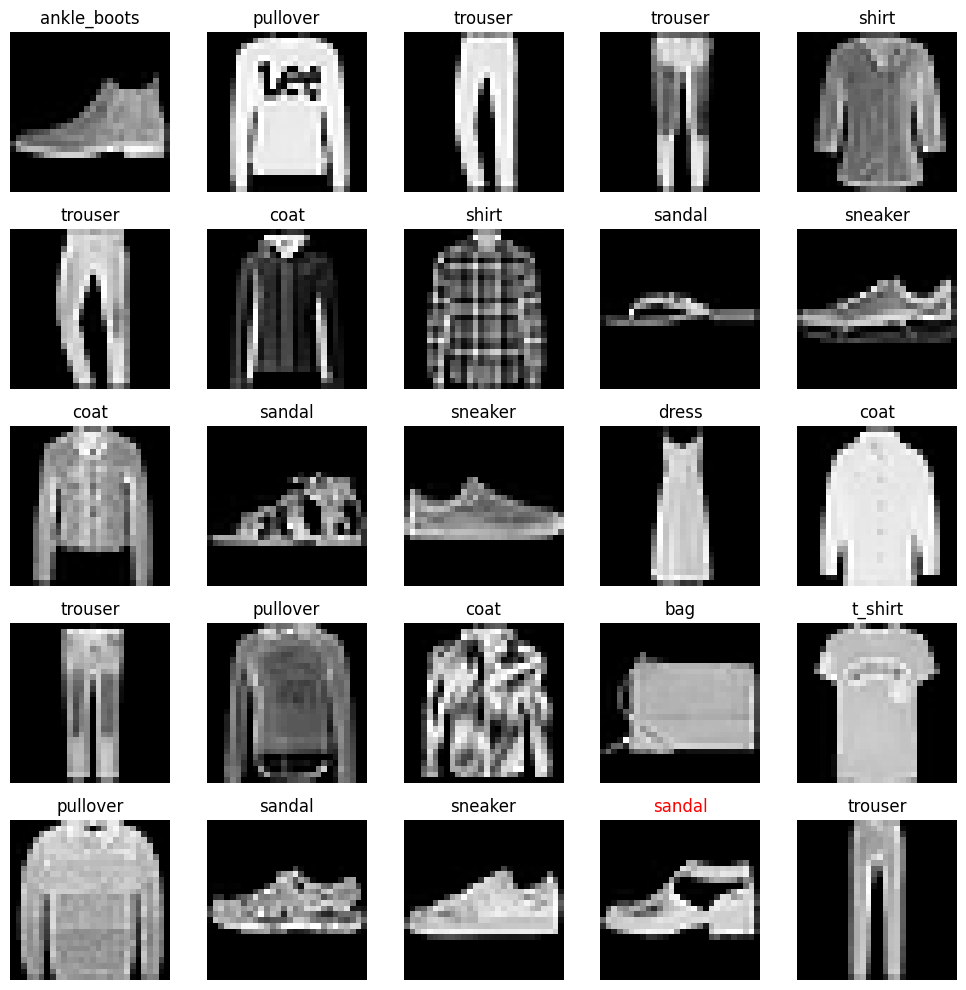

In [11]:
# Create a grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

# Iterate over the first 25 test samples
for i in range(25):
    # Plot the image
    axes[i].imshow(test_x[i], cmap="gray")
    axes[i].axis('off')

    # Get the predicted label
    predicted_label = labels[np.argmax(predictions[i])]
    correct_label = labels[test_y[i]]

    # Set the title with predicted label
    title_text = predicted_label
    title_color = 'red' if predicted_label != correct_label else 'black'
    axes[i].set_title(title_text, color=title_color)

plt.tight_layout()
plt.show()
